In [11]:
#import necessary libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder

In [12]:
#load the data
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df = df.drop("CustomerID",axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
df.rename(columns={"Genre":"Gender"},inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [18]:
#Elbow method (optimized k value)
out = []
for i in range(1,11):
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(df)
    out.append(model.inertia_)
out

[308862.06,
 221136.44188596494,
 158794.22150162974,
 104414.67534220166,
 97260.47893018977,
 68324.8224330509,
 51496.86065374506,
 44687.235534005464,
 42129.073845013845,
 38425.979654159426]

In [19]:
k_values = range(1,11)
KL = KneeLocator(k_values,out,curve='convex',direction="decreasing")
k = KL.elbow
print("K value: ",k)

K value:  4


Text(0.5, 1.0, 'Elbow curve')

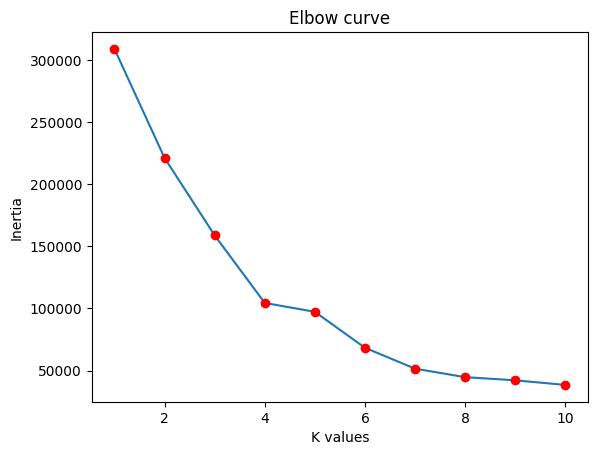

In [24]:
#Elbow curve
plt.plot(k_values,out,marker='o',markerfacecolor='red',markeredgecolor='red')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.title("Elbow curve")

In [25]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [26]:
labels = model.labels_
labels

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [27]:
df['clusters'] = labels

In [28]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

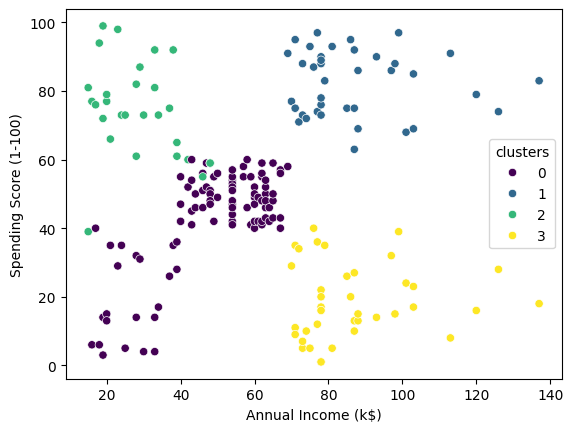

In [31]:
sns.scatterplot(x='Annual Income (k$)',y="Spending Score (1-100)",hue='clusters',data=df,palette="viridis")

In [33]:
print("Avg annual income : ",df['Annual Income (k$)'].mean())
print("Avg spending score :",df['Spending Score (1-100)'].mean())

Avg annual income :  60.56
Avg spending score : 50.2


cluster 0: Low income and Average Spending Score
cluster 1: High income and High Spending Score
cluster 2: Low income and High Spending Score
cluster 3: High income and Low Spending Score

In [34]:
df.to_csv("cleaned.csv")

In [35]:
#save the model
with open("KMeans_model.pkl","wb") as file:
    pickle.dump(model,file)